In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [37]:
df = kid_readout.analysis.archive.build_simple_archives('/data/detectors/pkl/2015-07-13_1*_irled.pkl')

In [38]:
df.shape

(480, 89)

In [39]:
dd = df[(df.atten==3)]

In [40]:
dd.shape

(480, 89)

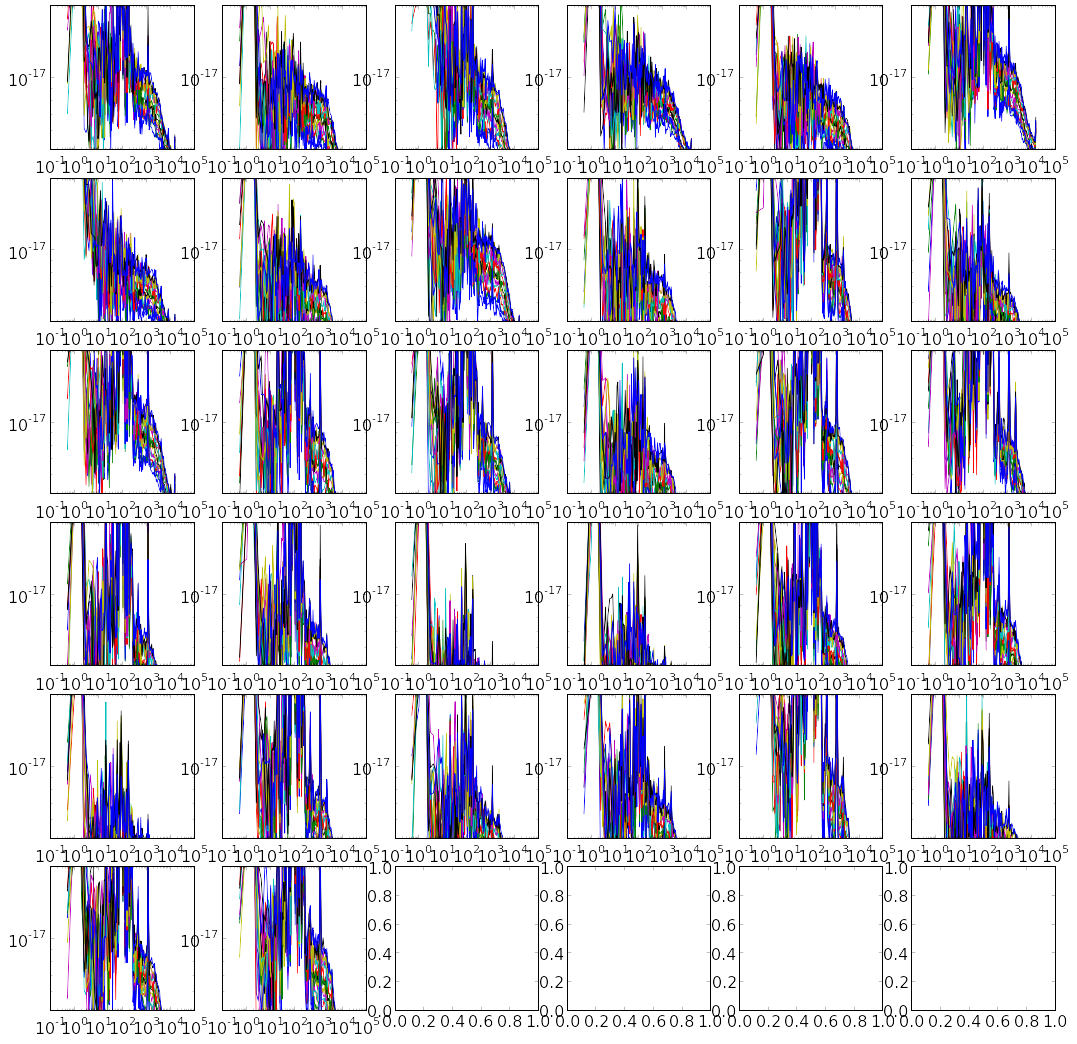

In [43]:
fig,axs = subplots(6,6,figsize=(18,18))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:])
    ax.set_ylim(5e-18,2e-17)

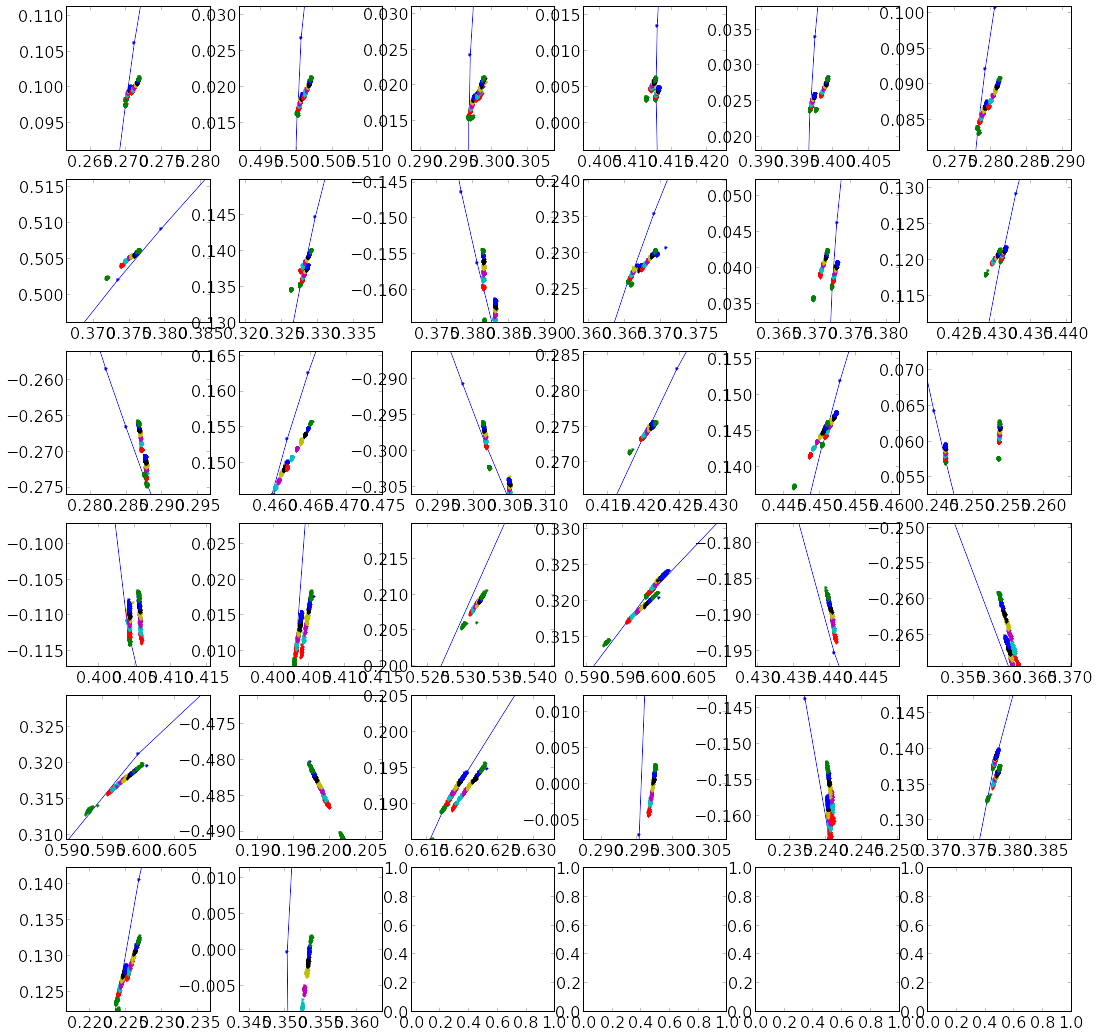

In [42]:
fig,axs = subplots(6,6,figsize=(18,18))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    sweep_plotted=False
    for m,row in group.iterrows():
        if not sweep_plotted:
            ax.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag,'.-')
            sweep_plotted=True
        ax.plot(row.low_pass_normalized_timeseries.real,row.low_pass_normalized_timeseries.imag,'.')
    x = row.low_pass_normalized_timeseries.real.mean()
    y = row.low_pass_normalized_timeseries.imag.mean()
    ax.set_xlim(x-0.01,x+0.01)
    ax.set_ylim(y-0.01,y+0.01)

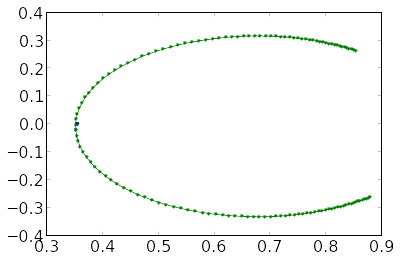

In [30]:
plot(row.low_pass_normalized_timeseries.real,row.low_pass_normalized_timeseries.imag,'.')
plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag,'.-')

In [45]:
df = kid_readout.analysis.archive.add_noise_summary(df,device_band=(200,500),amplifier_band=(2000,20000))

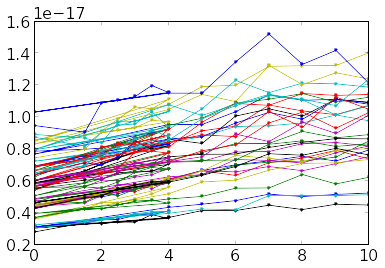

In [46]:
for k,dd in df.groupby(df.resonator_id):
    plot(dd.zbd_voltage,dd.device_noise,'.-')


In [41]:
G = 10**(-2/10.)

In [42]:
((1-G)/G)*20

11.69786384922227

In [44]:
120*20e-3

2.4

In [9]:
dd.zbd_voltage

322    0.0
354    1.5
Name: zbd_voltage, dtype: float64

In [21]:
np.sum(np.isfinite(df.a))

32

In [20]:
df.shape

(384, 89)

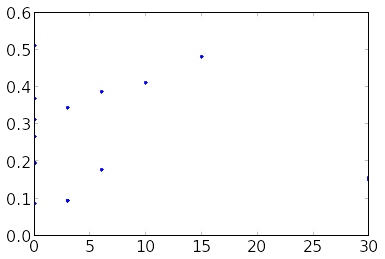

In [23]:
plot(df.atten,df.a,'.')

In [62]:
len(pkl)

NameError: name 'pkl' is not defined